# OCR 모델 이용해 text detection & text recognition 작업 수행

In [1]:
import pandas as pd
import numpy as np
import os
import json
import pprint
import glob

import cv2
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

import paddleocr
from paddleocr import PaddleOCR, draw_ocr
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
ocr_model = PaddleOCR(lang = 'korean')

img_path = '2ali6i.jpg'
result = ocr_model.ocr(img_path, cls = False)

[2024/09/02 02:20:50] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\UserK/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\UserK/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model

In [3]:
res = result[0]
print(type(res))
boxes = [res[i][0] for i in range(len(result[0]))] # 
texts = [res[i][1][0] for i in range(len(result[0]))]
scores = [float(res[i][1][1]) for i in range(len(result[0]))]

ocr_text_90 = []
ocr_bbox_90 = []
ocr_text_80 = []
ocr_bbox_80 = []

# bbox가 직각사각형이 아닐 수도 있다.
# 관련된 부분 전처리 필요

for t, s, b in zip(texts, scores, boxes):
    print(t, s, b)
    if s >= 0.8:
        ocr_text_80.append(t)
        ocr_bbox_80.append(b)
        
        if s >= 0.9:
            ocr_text_90.append(t)
            ocr_bbox_90.append(b)

print()
print(ocr_text_90, ocr_bbox_90)
print()
print(ocr_text_80, ocr_bbox_90)

<class 'list'>
Riseppointed 0.8323544859886169 [[130.0, 152.0], [550.0, 77.0], [569.0, 181.0], [149.0, 255.0]]
BUT 0.8771654963493347 [[69.0, 214.0], [364.0, 214.0], [364.0, 334.0], [69.0, 334.0]]
N요T 0.7563906311988831 [[429.0, 209.0], [729.0, 220.0], [724.0, 342.0], [425.0, 332.0]]
SURPRISE 0.9809025526046753 [[331.0, 356.0], [620.0, 308.0], [632.0, 377.0], [343.0, 425.0]]

['SURPRISE'] [[[331.0, 356.0], [620.0, 308.0], [632.0, 377.0], [343.0, 425.0]]]

['Riseppointed', 'BUT', 'SURPRISE'] [[[331.0, 356.0], [620.0, 308.0], [632.0, 377.0], [343.0, 425.0]]]


In [4]:
for t, s, b in zip(texts, scores, boxes):
    print(b)

[[130.0, 152.0], [550.0, 77.0], [569.0, 181.0], [149.0, 255.0]]
[[69.0, 214.0], [364.0, 214.0], [364.0, 334.0], [69.0, 334.0]]
[[429.0, 209.0], [729.0, 220.0], [724.0, 342.0], [425.0, 332.0]]
[[331.0, 356.0], [620.0, 308.0], [632.0, 377.0], [343.0, 425.0]]


In [5]:
ocr_bbox_80[0]

[[130.0, 152.0], [550.0, 77.0], [569.0, 181.0], [149.0, 255.0]]

[[130.0, 152.0], [550.0, 77.0], [569.0, 181.0], [149.0, 255.0]]
Riseppointed
0.8323544859886169


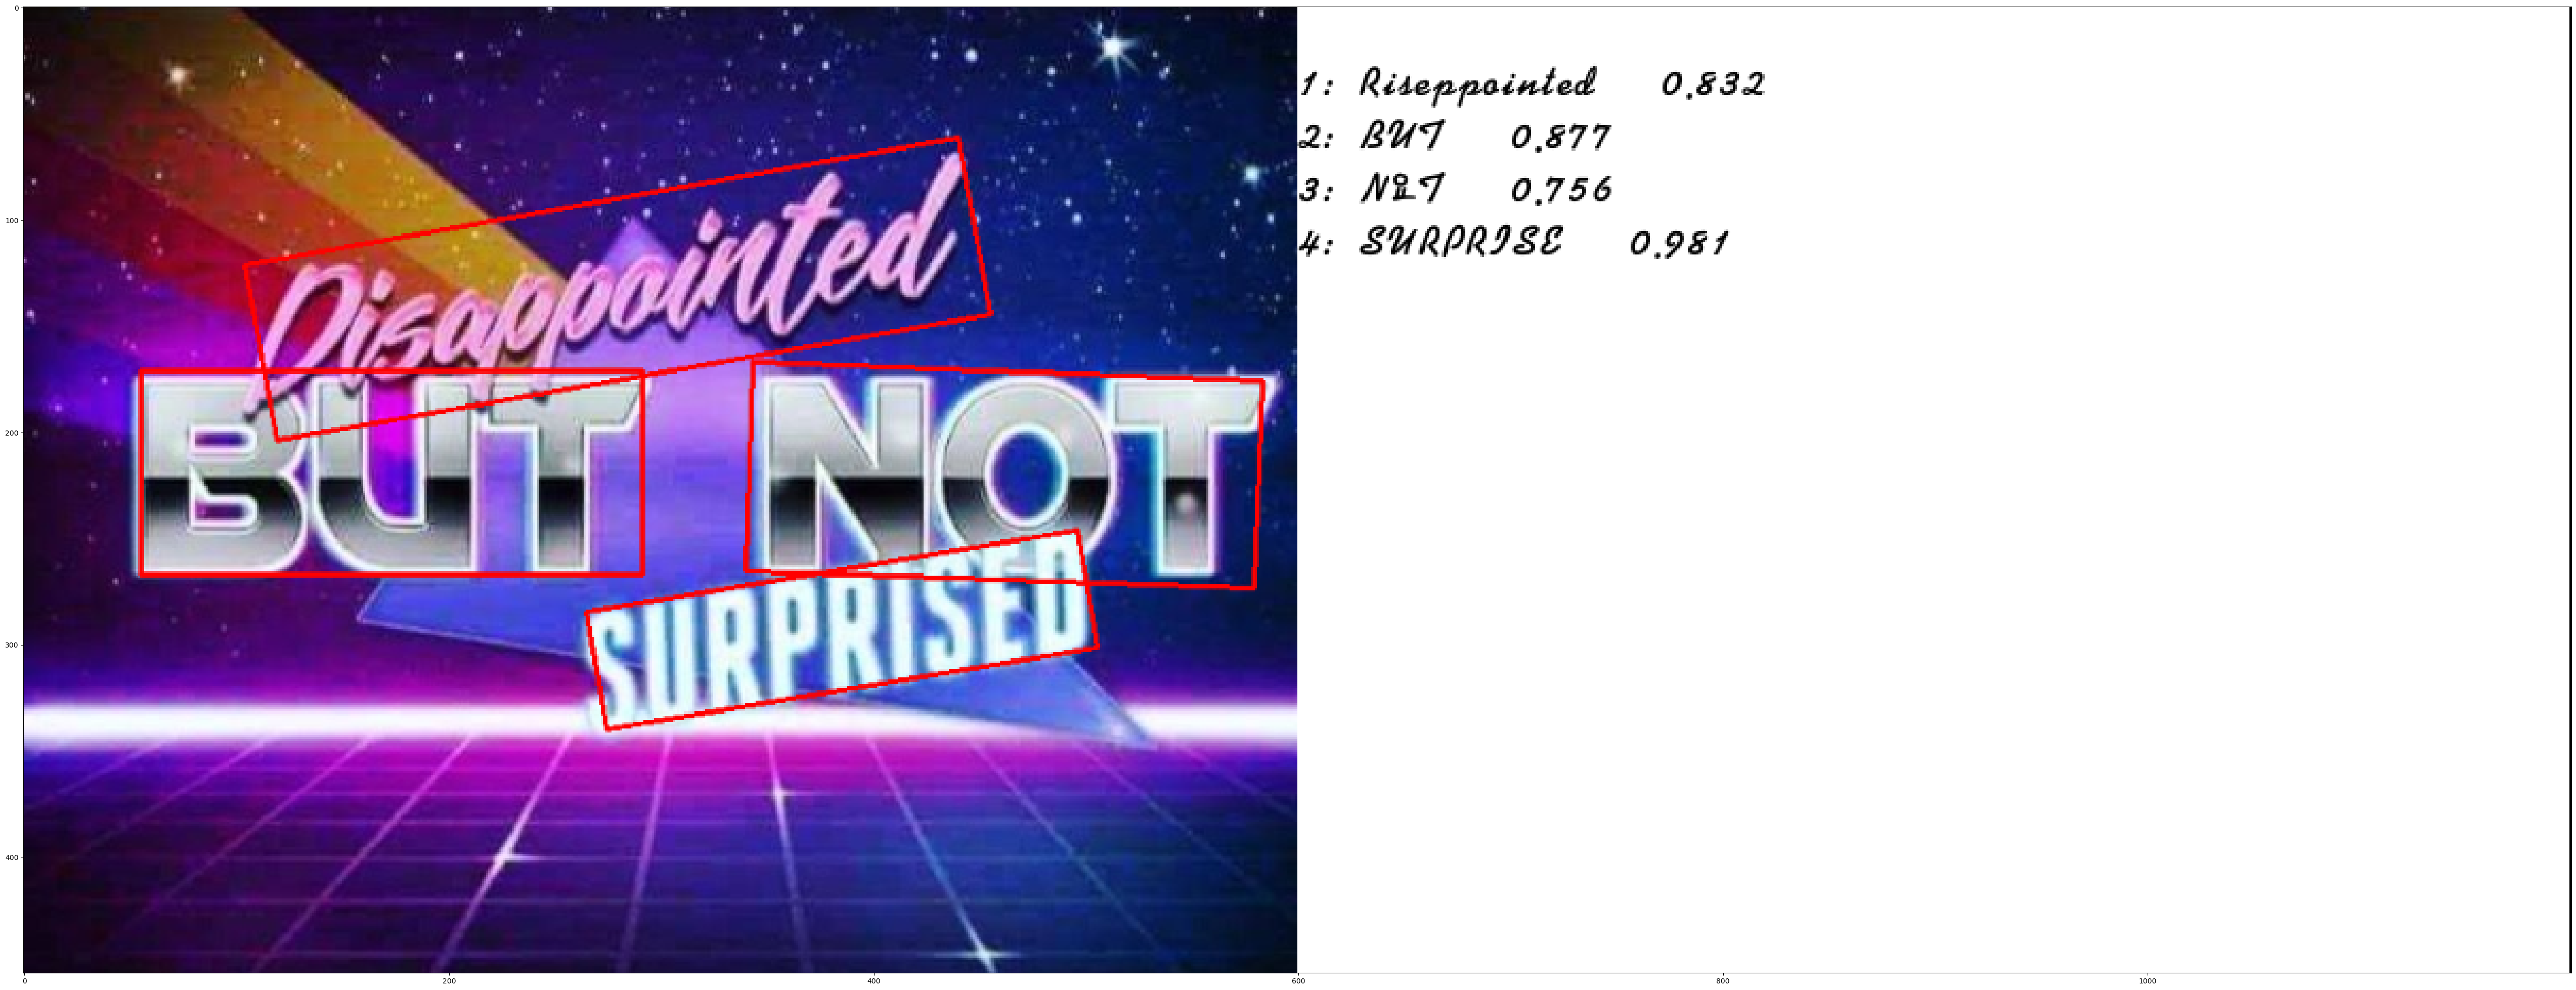

In [6]:
#for res in result:
print(boxes[0])
print(texts[0])
print(scores[0])#, Text: {res[1]}

# Specifying font path for draw_ocr method
font_path = 'C:/Users/UserK/ds_study/DL_proj/PaddleOCR-main/doc/fonts/korean.TTF'

img_path = 'C:/Users/UserK/ds_study/DL_proj/2ali6i.jpg'

# imports image
img = cv2.imread(img_path)

# reorders the color channelsa
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Visualize our image and detections
# resizing display area
plt.figure(figsize = (65, 65))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path = font_path) 

# show the image using matplotlib
plt.imshow(annotated)